In [61]:
import random
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification

random_state = random.randint(0, 500)
X, y = make_classification(n_samples=200, n_features=2, n_informative=1, n_redundant=0, n_classes=2,
                           n_clusters_per_class=1, random_state=random_state, flip_y=5.5)

In [62]:
X

array([[ 1.91860921, -0.7667277 ],
       [ 1.26354438, -0.60184866],
       [-1.84269016,  0.98291697],
       [-1.33998114,  2.08643688],
       [-1.41160827,  0.0147931 ],
       [ 0.76657289,  0.47651808],
       [ 0.23956348,  0.91546847],
       [-2.16767185,  1.4557381 ],
       [ 0.88762481,  1.88097553],
       [ 1.19380343, -0.66639644],
       [-0.71604219, -0.82872516],
       [ 0.64629723, -0.07052965],
       [ 1.68809297, -0.08720745],
       [ 0.99723729,  1.40247906],
       [ 0.53979213,  1.35899137],
       [ 0.85443004, -2.03440507],
       [-1.44819955, -0.15215128],
       [-0.18689151, -1.59595939],
       [ 0.84780905,  0.07405426],
       [-1.20506035,  0.46987402],
       [-2.23859116, -1.12864043],
       [ 1.21841258, -1.6843008 ],
       [-1.68684773, -0.11155446],
       [-0.0317892 , -1.55668562],
       [-1.98250495, -0.04521799],
       [-0.59704484,  0.31434676],
       [ 0.87866116, -0.16186748],
       [ 0.88920195,  0.18665575],
       [-2.02064936,

In [63]:
y

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1])

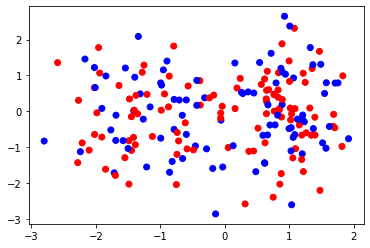

In [64]:
from matplotlib.colors import ListedColormap

colors = ListedColormap(['red', 'blue'])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors)

In [65]:
# Divide the dataset into training and test samples in the ratio 70/30.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

In [66]:
# Create a linear classification model using the L2 regularizer and train it on the training set.
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(penalty='l2', random_state=random_state)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=158)

In [67]:
from sklearn.linear_model import SGDClassifier

classifiers = [
    SGDClassifier(loss='hinge', penalty='l2', random_state=random_state),
    SGDClassifier(loss='modified_huber', penalty='l1', random_state=random_state),
]

In [68]:
# assess the quality of these models using the metrics of accuracy, recall, and F-measures.
from sklearn.metrics import accuracy_score, recall_score, f1_score


def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, recall, f1


for classifier in classifiers:
    classifier.fit(X_train, y_train)
    accuracy, recall, f1 = evaluate_model(classifier, X_test, y_test)
    print('Accuracy: {:.2f}'.format(accuracy))
    print('Recall: {:.2f}'.format(recall))
    print('F1: {:.2f}'.format(f1))
    print()

Accuracy: 0.52
Recall: 0.57
F1: 0.52

Accuracy: 0.38
Recall: 0.46
F1: 0.41



In [69]:
# Get the error matrix. Using this matrix, calculate the values of precision, recall and F1 score.
from sklearn.metrics import confusion_matrix


def get_error_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return confusion_matrix(y_test, y_pred)


for classifier in classifiers:
    classifier.fit(X_train, y_train)
    error_matrix = get_error_matrix(classifier, X_test, y_test)
    print('Error Matrix:')
    print(error_matrix)
    print()
    print('Precision: {:.2f}'.format(error_matrix[1, 1] / (error_matrix[1, 1] + error_matrix[0, 1])))
    print('Recall: {:.2f}'.format(error_matrix[1, 1] / (error_matrix[1, 1] + error_matrix[1, 0])))
    print('F1: {:.2f}'.format(2 * error_matrix[1, 1] / (error_matrix[1, 1] + error_matrix[0, 1] + error_matrix[1, 0])))
    print()

Error Matrix:
[[15 17]
 [12 16]]

Precision: 0.48
Recall: 0.57
F1: 0.71

Error Matrix:
[[10 22]
 [15 13]]

Precision: 0.37
Recall: 0.46
F1: 0.52



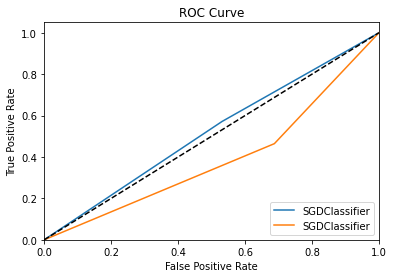

In [70]:
# Obtain the FPR and TPR values for the models under consideration.
from sklearn.metrics import roc_curve


def get_roc_curve(model, X_test, y_test):
    y_pred = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    return fpr, tpr


for classifier in classifiers:
    classifier.fit(X_train, y_train)
    fpr, tpr = get_roc_curve(classifier, X_test, y_test)
    plt.plot(fpr, tpr, label=classifier.__class__.__name__)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()